<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/An%C3%A1lise_de_s%C3%A9ries_temporais_para_previs%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1

## Vídeo 1.2

In [1]:
import pandas as pd

In [2]:
carbonico = pd.read_csv('https://github.com/Daniel-ASG/Aulas_de_cursos/raw/main/co2.csv',sep='\t')

In [3]:
carbonico.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


In [4]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

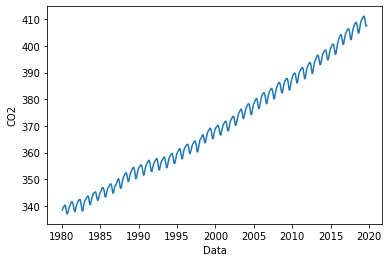

In [5]:
plt.plot(carbonico['data'],carbonico['media'])
plt.ylabel('CO2')
plt.xlabel('Data')

In [6]:
nasc = pd.read_csv('https://github.com/Daniel-ASG/Aulas_de_cursos/raw/main/nascimentos.csv')

In [7]:
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


Text(0.5, 0, 'Data')

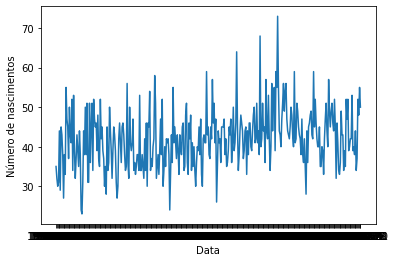

In [8]:
plt.plot(nasc["data"],nasc['n_nasc'])
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

In [9]:
nasc["data"] = pd.to_datetime(nasc["data"])

In [10]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0.5, 0, 'Data')

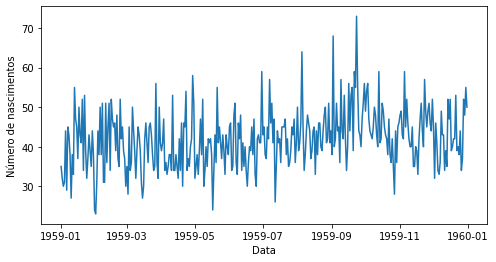

In [11]:
plt.figure(figsize = (8,4));
plt.plot(nasc["data"],nasc['n_nasc'])
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

## Vídeo 1.3

In [12]:
import numpy as np

In [13]:
media_carb = np.mean(carbonico["media"])

In [14]:
dt_carb = carbonico["data"][1]-carbonico["data"][0]

Text(0.5, 0, 'Data')

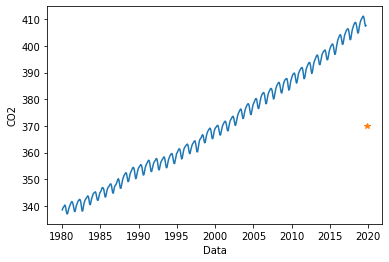

In [15]:
plt.plot(carbonico["data"],carbonico['media'])
plt.plot(carbonico.iloc[-1,0]+dt_carb,media_carb, '*')
plt.ylabel("CO2")
plt.xlabel("Data")

In [16]:
media_nasc = np.mean(nasc["n_nasc"])

In [17]:
dt_nasc = nasc["data"][1]-nasc["data"][0]

Text(0.5, 0, 'Data')

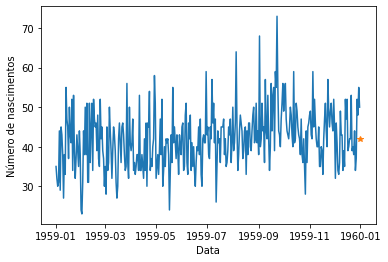

In [18]:
plt.plot(nasc["data"],nasc["n_nasc"])
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_nasc, '*')
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

In [19]:
carbonico.shape

(477, 2)

In [20]:
media_tres_pontos_c = np.mean(carbonico["media"][474:476])

Text(0.5, 0, 'Data')

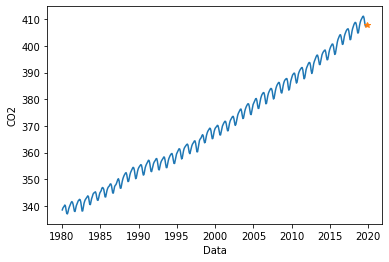

In [21]:
plt.plot(carbonico["data"],carbonico['media'])
plt.plot(carbonico.iloc[-1,0]+dt_carb,media_tres_pontos_c, '*')
plt.ylabel("CO2")
plt.xlabel("Data")

In [22]:
nasc.shape

(365, 2)

In [23]:
media_tres_pontos_n = np.mean(nasc["n_nasc"][362:364])

Text(0.5, 0, 'Data')

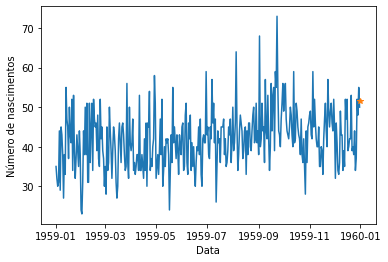

In [24]:
plt.plot(nasc["data"],nasc["n_nasc"])
plt.plot(nasc.iloc[-1,0]+dt_nasc,media_tres_pontos_n, '*')
plt.ylabel("Número de nascimentos")
plt.xlabel("Data")

# Aula 2

## Vídeo 2.1

In [25]:
media_movel_c = carbonico.rolling(5).mean()

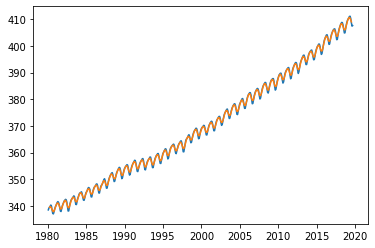

In [26]:
plt.plot(carbonico['data'],carbonico['media'])
plt.plot(media_movel_c['data'],media_movel_c['media'])

In [27]:
#A média móvel para o nascimento não retorna a coluna de data por causa do
# formato da data
media_movel_n = nasc.rolling(5).mean()

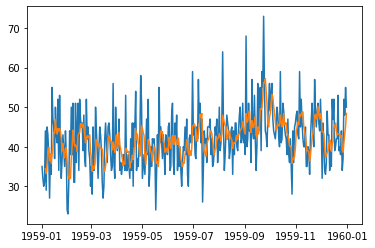

In [28]:
plt.plot(nasc['data'],nasc['n_nasc'])
plt.plot(nasc['data'],media_movel_n['n_nasc'])

In [29]:
#!pip install statsmodels==v0.11.0rc2

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
result_c = seasonal_decompose(carbonico.set_index('data'),freq=35)

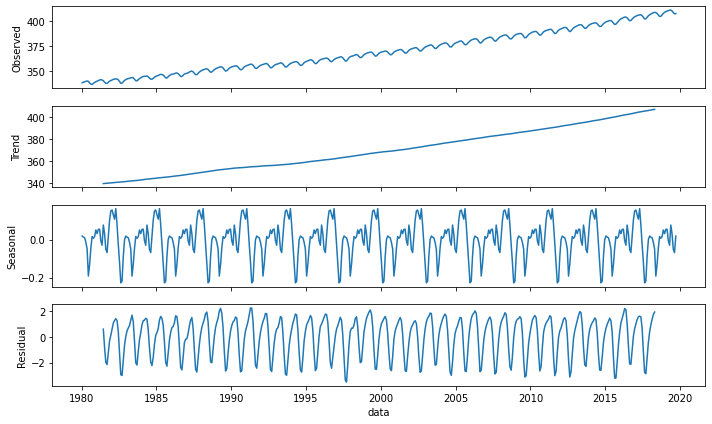

In [33]:
plt.rcParams['figure.figsize'] = (10,6)
result_c.plot();

In [35]:
result_n = seasonal_decompose(nasc.set_index('data'),freq=35)

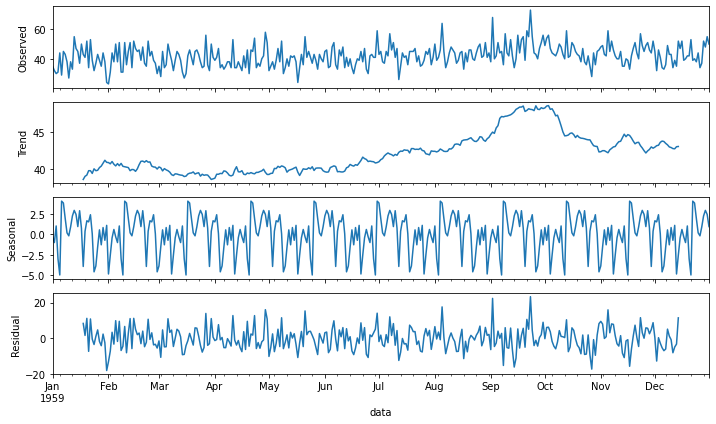

In [36]:
result_n.plot();

## Vídeo 2.2

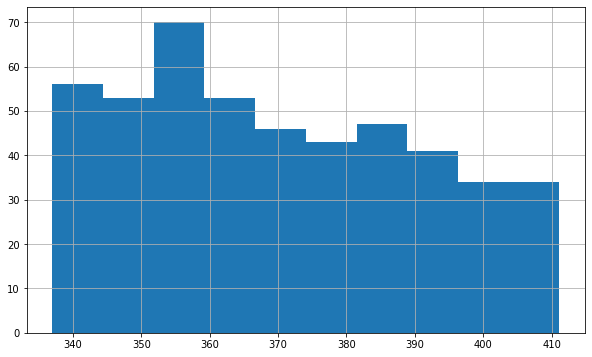

In [37]:
carbonico['media'].hist()

In [38]:
divide = int(len(carbonico)/2)

In [39]:
X = carbonico['media'].values

In [40]:
C1, C2 = X[0:divide],X[divide:]

In [41]:
C1.mean()

352.31550420168065

In [42]:
C2.mean()

387.816359832636

In [43]:
C1.var()

73.90219533401597

In [44]:
C2.var()

151.542490933282

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa16d444f98>]],
      dtype=object)

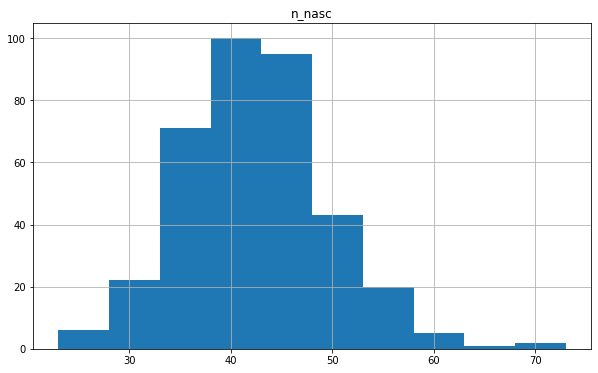

In [45]:
nasc.hist()

In [46]:
divide = int(len(nasc)/2)

In [47]:
X = nasc['n_nasc'].values

In [48]:
N1, N2 = X[0:divide],X[divide:]

In [49]:
N1.mean()

39.76373626373626

In [50]:
N2.mean()

44.185792349726775

In [51]:
N1.var()

49.21341021615746

In [52]:
N2.var()

48.708650601690096

## Vídeo 2.3

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
resultado_c = adfuller(carbonico['media'].values)

In [55]:
print('Estatística ADF',resultado_c[0])

Estatística ADF 3.036828829167019


In [56]:
print('p-valor: %f' % resultado_c[1])

p-valor: 1.000000


In [57]:
resultado_n = adfuller(nasc['n_nasc'].values)

In [58]:
print('Estatística ADF',resultado_n[0])

Estatística ADF -4.808291253559764


In [59]:
print('p-valor: %f' % resultado_n[1])

p-valor: 0.000052


# Aula 3

## Vídeo 3.1

In [60]:
#Suavização Exponencial
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [61]:
carbonico = carbonico.set_index('data')

In [62]:
carbonico_treino = carbonico[1980.042:2015]
carbonico_teste = carbonico[2015:]

In [63]:
modelo_ajustado = SimpleExpSmoothing(carbonico_treino).fit(smoothing_level=0.5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [64]:
carbonico_teste.shape

(57, 1)

In [65]:
modelo_previsto = modelo_ajustado.forecast(57)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


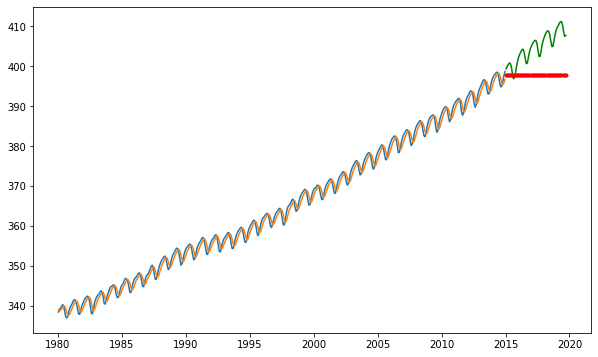

In [66]:
plt.plot(carbonico_treino)
plt.plot(carbonico_treino.index,modelo_ajustado.fittedvalues.values)
plt.plot(carbonico_teste,'g')
plt.plot(carbonico_teste.index,modelo_previsto,'r.')

In [67]:
nasc = nasc.set_index('data')

In [68]:
nasc_treino = nasc['1959-01-01':'1959-12-01']
nasc_teste = nasc['1959-12-01':]

In [69]:
nasc_teste.shape[0]

31

In [70]:
modelo_ajustado = SimpleExpSmoothing(nasc_treino).fit(smoothing_level=0.5) #

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [71]:
modelo_previsto = modelo_ajustado.forecast(31)

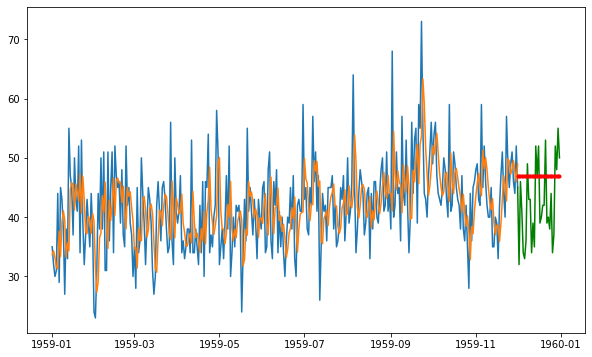

In [72]:
plt.plot(nasc_treino)
plt.plot(nasc_treino.index,modelo_ajustado.fittedvalues.values)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index,modelo_previsto,'r.')

## Vídeo 3.3

In [73]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [74]:
modelo_ajustado = ExponentialSmoothing(carbonico_treino.values, trend='additive',
                                       seasonal='additive', seasonal_periods=35).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [75]:
carbonico_treino.shape

(420, 1)

In [76]:
carbonico_teste.shape

(57, 1)

In [77]:
modelo_previsto = modelo_ajustado.predict(start=420,end=476)

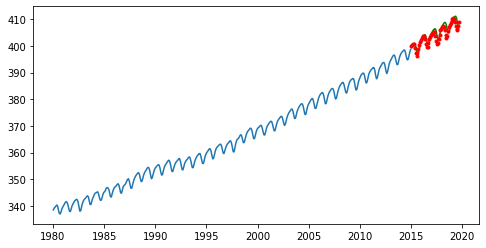

In [78]:
plt.figure(figsize = (8,4))
plt.plot(carbonico_treino)
plt.plot(carbonico_teste,'g')
plt.plot(carbonico_teste.index,modelo_previsto,'r.')

In [79]:
modelo_ajustado = ExponentialSmoothing(nasc_treino.values,
                                       trend='multiplicative', seasonal=None).fit()

In [80]:
nasc_treino.shape

(335, 1)

In [81]:
nasc_teste.shape

(31, 1)

In [82]:
modelo_previsto_suave = modelo_ajustado.predict(start=335,end=365)

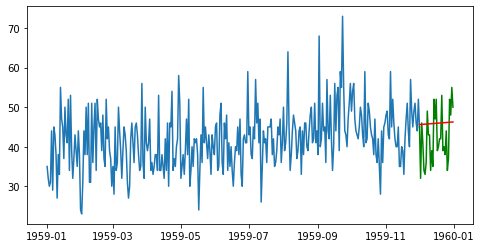

In [83]:
plt.figure(figsize = (8,4))
plt.plot(nasc_treino)
plt.plot(nasc_teste,'g')
plt.plot(nasc_teste.index,modelo_previsto_suave,'r-')